In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,NaN,0.61,NaN,NaN,0.5,0.0,NaN,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,NaN,0.44,NaN,NaN,NaN,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,NaN,0.63,NaN,NaN,0.5,NaN,0.50,0.22
1480,0.35,0.29,0.46,0.14,0.5,0.0,0.54,0.66
1481,0.41,0.47,0.50,0.14,0.5,0.0,0.53,0.37
1482,0.51,0.45,0.62,0.25,0.5,0.0,0.59,0.22


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	297
float64		column 2	296
float64		column 3	593
float64		column 4	519
float64		column 5	148
float64		column 6	75
float64		column 7	222
float64		column 8	222


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1187.000000,1188.000000,891.000000,965.000000,1336.000000,1409.000000,1262.000000,1262.000000
mean,0.502595,0.497416,0.500247,0.262518,0.504491,0.006955,0.499889,0.277353
std,0.135803,0.120495,0.081428,0.137872,0.047191,0.073328,0.055654,0.108463
min,0.180000,0.130000,0.210000,0.040000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.160000,0.500000,0.000000,0.480000,0.220000
50%,0.490000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.580000,0.570000,0.550000,0.320000,0.500000,0.000000,0.530000,0.300000
max,1.000000,1.000000,0.750000,1.000000,1.000000,0.830000,0.730000,1.000000


<AxesSubplot:>

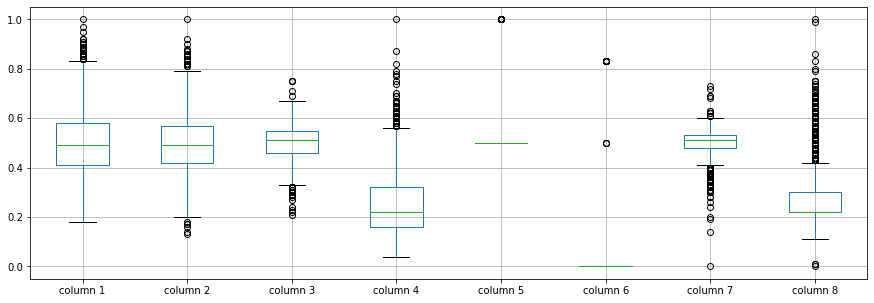

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.502595
column 2    0.497416
column 3    0.500247
column 4    0.262518
column 5    0.504491
column 6    0.006955
column 7    0.499889
column 8    0.277353
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.532472,-0.121633,0.135175,-0.017691,0.013980,0.051288,-0.160349
column 2,0.532472,1.000000,-0.213363,0.154310,0.061564,0.005945,0.025725,-0.091896
column 3,-0.121633,-0.213363,1.000000,0.014285,0.005684,0.043911,-0.111294,0.015013
column 4,0.135175,0.154310,0.014285,1.000000,0.023174,-0.010723,-0.041849,-0.023486
column 5,-0.017691,0.061564,0.005684,0.023174,1.000000,-0.006995,0.032603,-0.010211
column 6,0.013980,0.005945,0.043911,-0.010723,-0.006995,1.000000,0.005337,-0.026897
column 7,0.051288,0.025725,-0.111294,-0.041849,0.032603,0.005337,1.000000,0.068704
column 8,-0.160349,-0.091896,0.015013,-0.023486,-0.010211,-0.026897,0.068704,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+70,8+70+70,8+70+70+70,8+70+70+70+70,8+70+70+70+70+70,8+70+70+70+70+70+70,8+70+70+70+70+70,8+70+70+70+70,8+70+70+70,8+70+70,8+70,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.2139367305714153
Epoch: 1 , loss: 1.87870559355487
Epoch: 2 , loss: 1.7539071622102156
Epoch: 3 , loss: 1.6405940224295077
Epoch: 4 , loss: 1.5344573440759077
Epoch: 5 , loss: 1.4703877853310627
Epoch: 6 , loss: 1.410911228345788
Epoch: 7 , loss: 1.3533769470194112
Epoch: 8 , loss: 1.2790385743846064
Epoch: 9 , loss: 1.2531299273604932
Epoch: 10 , loss: 1.2110140479129294
Epoch: 11 , loss: 1.1605642852575884
Epoch: 12 , loss: 1.1340571298547413
Epoch: 13 , loss: 1.102247898993285
Epoch: 14 , loss: 1.08741128185521
Epoch: 15 , loss: 1.0617250301267789
Epoch: 16 , loss: 1.0254485082367193
Epoch: 17 , loss: 1.0323290624048398
Epoch: 18 , loss: 0.990078096156535
Epoch: 19 , loss: 0.970527374226114
Epoch: 20 , loss: 0.9689445774192396
Epoch: 21 , loss: 0.941756151292635
Epoch: 22 , loss: 0.9556093714807344
Epoch: 23 , loss: 0.9245422573193259
Epoch: 24 , loss: 0.9180050978194112
Epoch: 25 , loss: 0.8910323

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,-0.165364,0.000000,-0.053863,0.091084,0.000000,0.000000,-0.048545,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.151174,0.000000,0.079859,-0.245535,0.061549,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...
1479,-0.408114,0.000000,-0.066684,0.040223,0.000000,0.000302,0.000000,0.0
1480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(7.778225075417448, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.16583236480135038

In [18]:
new_df.iloc[66,:]

column 1    0.460000
column 2    0.581644
column 3    0.576229
column 4    0.297332
column 5    0.500000
column 6    0.000000
column 7    0.440000
column 8    0.314088
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.414636,0.610000,0.416137,0.221084,0.500000,0.000000,0.431455,0.22
1,0.430000,0.670000,0.480000,0.270000,0.500000,0.000000,0.530000,0.22
2,0.640000,0.620000,0.490000,0.150000,0.500000,0.000000,0.530000,0.22
3,0.580000,0.440000,0.570000,0.130000,0.500000,0.000000,0.540000,0.22
4,0.571174,0.440000,0.559859,0.294465,0.561549,0.000000,0.480000,0.22
...,...,...,...,...,...,...,...,...
1479,0.411886,0.630000,0.403316,0.220223,0.500000,0.000302,0.500000,0.22
1480,0.350000,0.290000,0.460000,0.140000,0.500000,0.000000,0.540000,0.66
1481,0.410000,0.470000,0.500000,0.140000,0.500000,0.000000,0.530000,0.37
1482,0.510000,0.450000,0.620000,0.250000,0.500000,0.000000,0.590000,0.22


In [20]:
imputations[-1].to_excel("Yeast_AW_20(imp).xlsx", index=False, header=False)